In [1]:
import sys
sys.path.append('../') # or just install the module
sys.path.append('../../flaming-choripan') # or just install the module

In [2]:
import numpy as np

days_r = np.array([  5.0656829,   8.0996528,  13.061713 ,  22.0009838,  26.0215625,
        28.9802662,  39.0096875,  44.9532755,  49.0039121,  60.9926389,
        66.975706 ,  69.9134838,  72.9389468,  75.9405671,  80.8963426,
        86.8977894,  92.9196528,  97.9758681, 100.8779861, 103.9104283,
       108.9143982, 111.8984259, 114.9420139, 122.8789236, 148.8506482])
obs_r = np.array([0.09369501, 0.12422294, 0.17632272, 0.21543042, 0.26436687,
       0.28861551, 0.33934311, 0.34162441, 0.3635561 , 0.35546735,
       0.32118441, 0.29078965, 0.26576802, 0.23397065, 0.20949038,
       0.18816455, 0.16633398, 0.17401421, 0.16234064, 0.14769087,
       0.15370163, 0.14437344, 0.14757494, 0.15973237, 0.06021994])
obse_r = np.array([0.01520713, 0.01580251, 0.01577605, 0.03399303, 0.01714344,
       0.01226538, 0.02021915, 0.0196518 , 0.01763097, 0.01974572,
       0.02135111, 0.01782387, 0.01586518, 0.01186198, 0.01960087,
       0.01389926, 0.01094066, 0.0110298 , 0.01334426, 0.01444601,
       0.01355199, 0.0122024 , 0.01094715, 0.01098468, 0.00795538])
days_g = np.array([  0.       ,   5.041794 ,  13.1063773,  16.0641551,  18.9786921,
        32.9421644,  39.1044097,  44.9796991,  48.936956 ,  60.9187847,
        66.9435417,  69.9383333,  72.8977315,  75.8996991,  83.8982755,
        86.9468634,  89.8980324,  97.8986921, 100.912581 , 114.8746065,
       117.8932176, 122.902882 , 125.9555324])
obs_g = np.array([0.04058823, 0.08495003, 0.15179164, 0.16671223, 0.18171548,
       0.21404183, 0.21082352, 0.20682718, 0.19194895, 0.18450144,
       0.14277814, 0.12811022, 0.11172354, 0.09822171, 0.07378358,
       0.06712033, 0.06358189, 0.06440931, 0.05949815, 0.06132898,
       0.06220779, 0.05560232, 0.05380362])
obse_g = np.array([0.00802027, 0.00985233, 0.01225903, 0.01328017, 0.01388184,
       0.01358495, 0.01222989, 0.01319812, 0.0132215 , 0.01339098,
       0.010816  , 0.01117299, 0.00979144, 0.0105853 , 0.01572488,
       0.00995968, 0.00726456, 0.00712653, 0.00626655, 0.00913009,
       0.00674099, 0.00771989, 0.00955539])

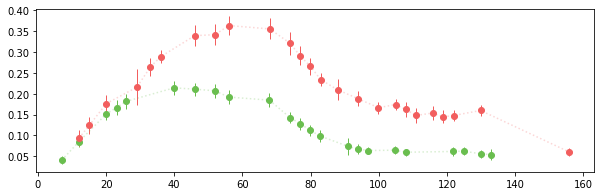

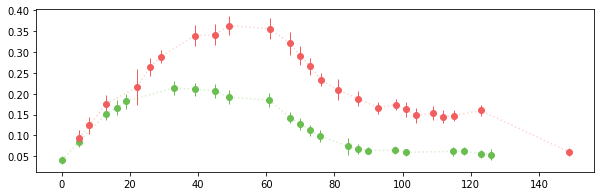

148.8506482


In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
from lchandler.lc_classes import LCO
from lchandler.plots.lc import plot_lightcurve
import matplotlib.pyplot as plt

band_names = ['g', 'r']
lcobj = LCO()
lcobj.add_b('g', days_g+7, obs_g, obse_g)
lcobj.add_b('r', days_r+7, obs_r, obse_r)

fig, ax = plt.subplots(1, 1, figsize=(10,3))
for kb,b in enumerate(band_names):
    plot_lightcurve(ax, lcobj, b)
    
day_offset = lcobj.reset_day_offset_serial()
fig, ax = plt.subplots(1, 1, figsize=(10,3))
for kb,b in enumerate(band_names):
    plot_lightcurve(ax, lcobj, b)
plt.show()
print(lcobj.get_days_serial_duration())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


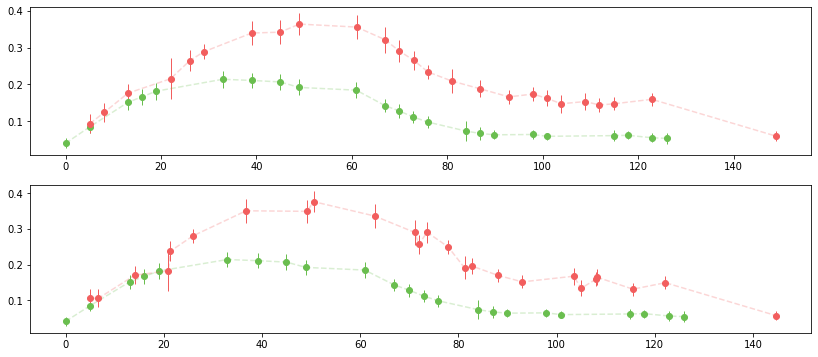

144.62981097027432


In [72]:
%load_ext autoreload
%autoreload 2
import numpy as np
from lchandler.lc_classes import LCO

lcobj2 = lcobj.copy()
lcobj2.r.set_log('obs')
lcobj2.r.add_day_noise_uniform(24*5) # add day noise
lcobj2.r.add_obs_noise_gaussian(1, 0) # add obs noise

fig, axs = plt.subplots(2, 1, figsize=(14,6))
ax = axs[0]
for kb,b in enumerate(band_names):
    plot_lightcurve(ax, lcobj, b)
ax = axs[1]
for kb,b in enumerate(band_names):
    plot_lightcurve(ax, lcobj2, b)
plt.show()
print(lcobj2.get_days_serial_duration())

In [44]:
lcobj2.get_onehot_serial().T

array([[ True, False,  True, False, False,  True,  True, False,  True,
        False, False,  True,  True, False,  True, False, False,  True,
        False,  True,  True, False, False, False,  True,  True,  True,
        False, False,  True, False,  True, False,  True, False,  True,
        False, False,  True, False, False, False,  True,  True,  True,
        False,  True, False],
       [False,  True, False,  True,  True, False, False,  True, False,
         True,  True, False, False,  True, False,  True,  True, False,
         True, False, False,  True,  True,  True, False, False, False,
         True,  True, False,  True, False,  True, False,  True, False,
         True,  True, False,  True,  True,  True, False, False, False,
         True, False,  True]])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[ 0.         3.0339699  4.9620602  8.9392708  4.0205787  2.9587037
 10.0294213  5.943588   4.0506366 11.9887268  5.9830671  2.9377778
  3.025463   3.0016203  4.9557755  6.0014468  6.0218634  5.0562153
  2.902118   3.0324422  5.0039699  2.9840277  3.043588   7.9369097
 25.9717246]
[ 0.         3.0339699  4.9620602 12.9598495 12.988125   9.9942246
 11.9887268  5.9830671  2.9377778 28.0623843  2.902118   3.0324422
 11.0315856]


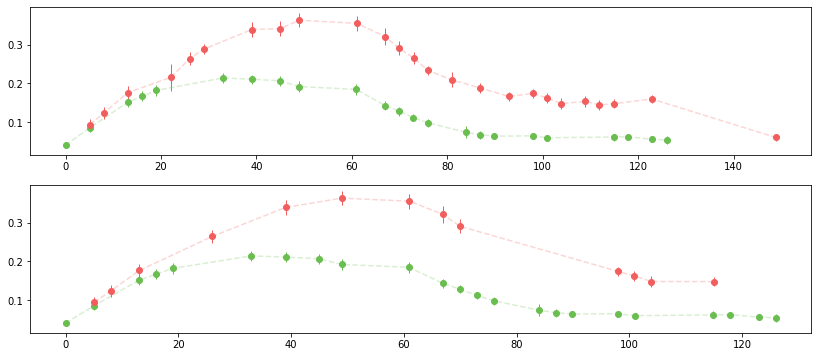

In [40]:
%load_ext autoreload
%autoreload 2
import numpy as np
from lchandler.lc_classes import LCO

lcobj2 = lcobj.copy()
lcobj2.r.set_diff('days')
print(lcobj2.r.d_days)
lcobj2.r.apply_downsampling(0.5) # apply_downsampling
print(lcobj2.r.d_days)

fig, axs = plt.subplots(2, 1, figsize=(14,6))
ax = axs[0]
for kb,b in enumerate(band_names):
    plot_lightcurve(ax, lcobj, b)
ax = axs[1]
for kb,b in enumerate(band_names):
    plot_lightcurve(ax, lcobj2, b)
plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
148.8506482


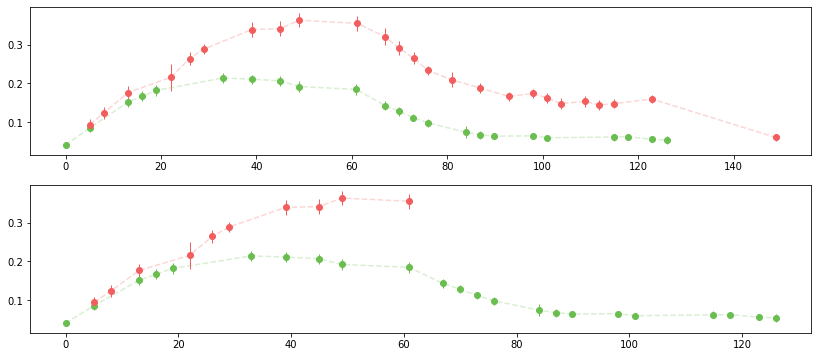

In [47]:
%load_ext autoreload
%autoreload 2
import numpy as np
from lchandler.lc_classes import LCO

lcobj2 = lcobj.copy()
lcobj2.r.clip_attrs_given_max_duration(60)
fig, axs = plt.subplots(2, 1, figsize=(14,6))
ax = axs[0]
for kb,b in enumerate(band_names):
    plot_lightcurve(ax, lcobj, b)
ax = axs[1]
for kb,b in enumerate(band_names):
    plot_lightcurve(ax, lcobj2, b)
plt.show()

# complete data augmentation

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


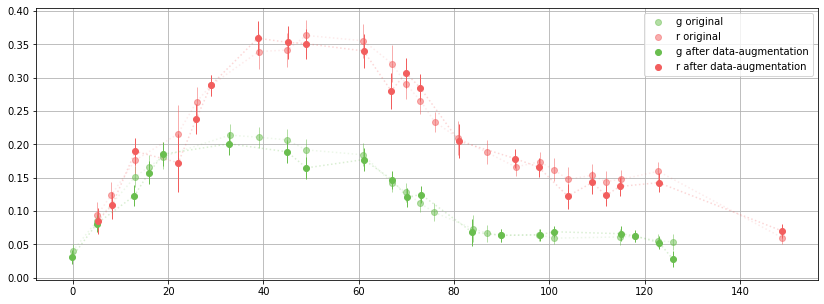

In [23]:
%load_ext autoreload
%autoreload 2
import numpy as np
from lchandler.lc_classes import LCO

lcobj2 = lcobj.copy()
for b in lcobj2.bands:
    lcobj2.get_b(b).apply_downsampling(0.1) # apply_downsampling
    lcobj2.get_b(b).add_day_noise_uniform(5)
    lcobj2.get_b(b).add_obs_noise_gaussian(0, 1)
    
fig, axs = plt.subplots(1, 1, figsize=(14,5))
ax = axs
for kb,b in enumerate(band_names):
    plot_lightcurve(ax, lcobj, b, alpha=0.5, label=f'{b} original')
for kb,b in enumerate(band_names):
    plot_lightcurve(ax, lcobj2, b, label=f'{b} after data-augmentation')
ax.legend(loc='upper right')
ax.grid(0.5)
plt.show()